In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *
from nba_api.stats.endpoints import shotchartleaguewide
from IPython.core.display import HTML

pd.options.mode.chained_assignment = None

shots_DIR = "../data/ShotLocationData/"
box_DIR = "../data/box/"
img_DIR_P = "../data/images/players/"

In [2]:
season = 2024
all_shots = pd.read_parquet(shots_DIR + f"NBA_Shot_Details_{season}" + ".parquet")
all_shots.columns = map(str.lower, all_shots.columns)
all_shots = all_shots.rename(columns={"shot_made_flag":"shot_made"})
all_shots["loc_x"] = all_shots["loc_x"]/10
all_shots["loc_y"] = all_shots["loc_y"]/10
all_shots['fg2'] = np.where(all_shots['shot_type'] == '2PT Field Goal', 1, 0)
all_shots['fg3'] = np.where(all_shots['shot_type'] == '3PT Field Goal', 1, 0)
all_shots["points"] = (2*all_shots['fg2'] + 3*all_shots['fg3'])*all_shots["shot_made"]
# shots = all_shots.loc[all_shots['shot_distance'] <= 32].reset_index(drop=True)
# shots = all_shots.copy()

In [3]:
sts = ["Dunk","Floater","Layup","Alley_Oop","Reverse","Step_Back","Hook","Turnaround","Bank","Jump","Cut","Drive","Finger_Roll","Pullup","Fadeaway","Tip"]
sts_st = ["Dunk","Floater","Layup","Alley","Reverse","Step Back","Hook","Turnaround","Bank","Jump","Cutting","Driving","Finger Roll","Pullup","Fadeaway","Tip"]
for s,st in zip(sts,sts_st):
    all_shots[s]=all_shots["action_type"].str.contains(st)
    if sts == "Pullup":
        all_shots[s]=all_shots["action_type"].str.contains(st) | all_shots["action_type"].str.contains("Pull-Up")

In [4]:
df = all_shots.query("shot_made == True")

In [15]:
all_shots

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,...,Hook,Turnaround,Bank,Jump,Cut,Drive,Finger_Roll,Pullup,Fadeaway,Tip
0,Shot Chart Detail,0022400001,7,1642258,Zaccharie Risacher,1610612737,Atlanta Hawks,1,11,43,...,False,False,False,True,False,False,False,False,False,False
1,Shot Chart Detail,0022400001,10,1630552,Jalen Johnson,1610612737,Atlanta Hawks,1,11,38,...,False,False,True,True,False,True,False,False,False,False
2,Shot Chart Detail,0022400001,12,1628401,Derrick White,1610612738,Boston Celtics,1,11,24,...,False,False,False,True,False,False,False,False,False,False
3,Shot Chart Detail,0022400001,21,1630552,Jalen Johnson,1610612737,Atlanta Hawks,1,10,50,...,False,False,False,True,False,False,False,False,False,False
4,Shot Chart Detail,0022400001,23,1627759,Jaylen Brown,1610612738,Boston Celtics,1,10,35,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100233,Shot Chart Detail,0022401230,705,1630578,Alperen Sengun,1610612745,Houston Rockets,4,0,47,...,False,False,False,True,False,False,False,False,False,False
100234,Shot Chart Detail,0022401230,707,1627832,Fred VanVleet,1610612745,Houston Rockets,4,0,42,...,False,False,False,True,False,False,False,True,False,False
100235,Shot Chart Detail,0022401230,715,1629652,Luguentz Dort,1610612760,Oklahoma City Thunder,4,0,24,...,False,False,False,True,False,False,False,False,False,False
100236,Shot Chart Detail,0022401230,719,1630224,Jalen Green,1610612745,Houston Rockets,4,0,13,...,False,False,False,False,False,True,True,False,False,False


In [5]:
df1 = df.groupby(["player_id","player_name"])[sts].sum().reset_index()
df1["P"]=img_DIR_P + df1["player_id"].astype(str) + ".png"

In [6]:
cols = ["PLAYER_ID","AGE"]
df2 = pd.read_parquet(box_DIR + f"NBA_Box_P_Cum_Base_{season}.parquet",columns=cols)
df2.columns = map(str.lower,df2.columns)
df3 = pd.merge(df1,df2,on=["player_id"])

In [7]:
df4 = df3.query("age >= 35").sort_values("Dunk",ascending=False).reset_index(drop=True)


In [11]:
df4

,player_id,player_name,Dunk,Floater,Layup,Alley_Oop,Reverse,Step_Back,Hook,Turnaround,Bank,Jump,Cut,Drive,Finger_Roll,Pullup,Fadeaway,Tip,P,age
0,203507,Giannis Antetokounmpo,121,0,161,20,10,3,16,23,3,68,44,133,72,39,20,13,../data/images/players/203507.png,30.0
1,203497,Rudy Gobert,100,0,46,37,5,0,1,0,0,3,35,9,1,0,0,10,../data/images/players/203497.png,32.0
2,1630596,Evan Mobley,96,0,66,16,1,0,26,13,10,63,53,56,7,6,5,11,../data/images/players/1630596.png,23.0
3,1631105,Jalen Duren,85,0,42,32,1,0,8,4,2,6,25,21,1,0,1,17,../data/images/players/1631105.png,21.0
4,1631218,Trayce Jackson-Davis,83,0,53,28,2,0,3,1,2,3,53,16,4,0,0,7,../data/images/players/1631218.png,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1630528,Josh Christopher,0,0,2,0,0,0,0,0,0,0,0,1,2,0,0,0,../data/images/players/1630528.png,23.0
495,1630537,Chris Duarte,0,0,5,0,1,1,0,0,0,7,0,6,1,0,0,0,../data/images/players/1630537.png,27.0
496,1630558,Davion Mitchell,0,0,39,0,4,3,0,0,0,38,0,32,11,5,0,0,../data/images/players/1630558.png,26.0
497,1630560,Cam Thomas,0,0,34,0,3,25,0,5,5,113,1,44,8,32,7,0,../data/images/players/1630560.png,23.0


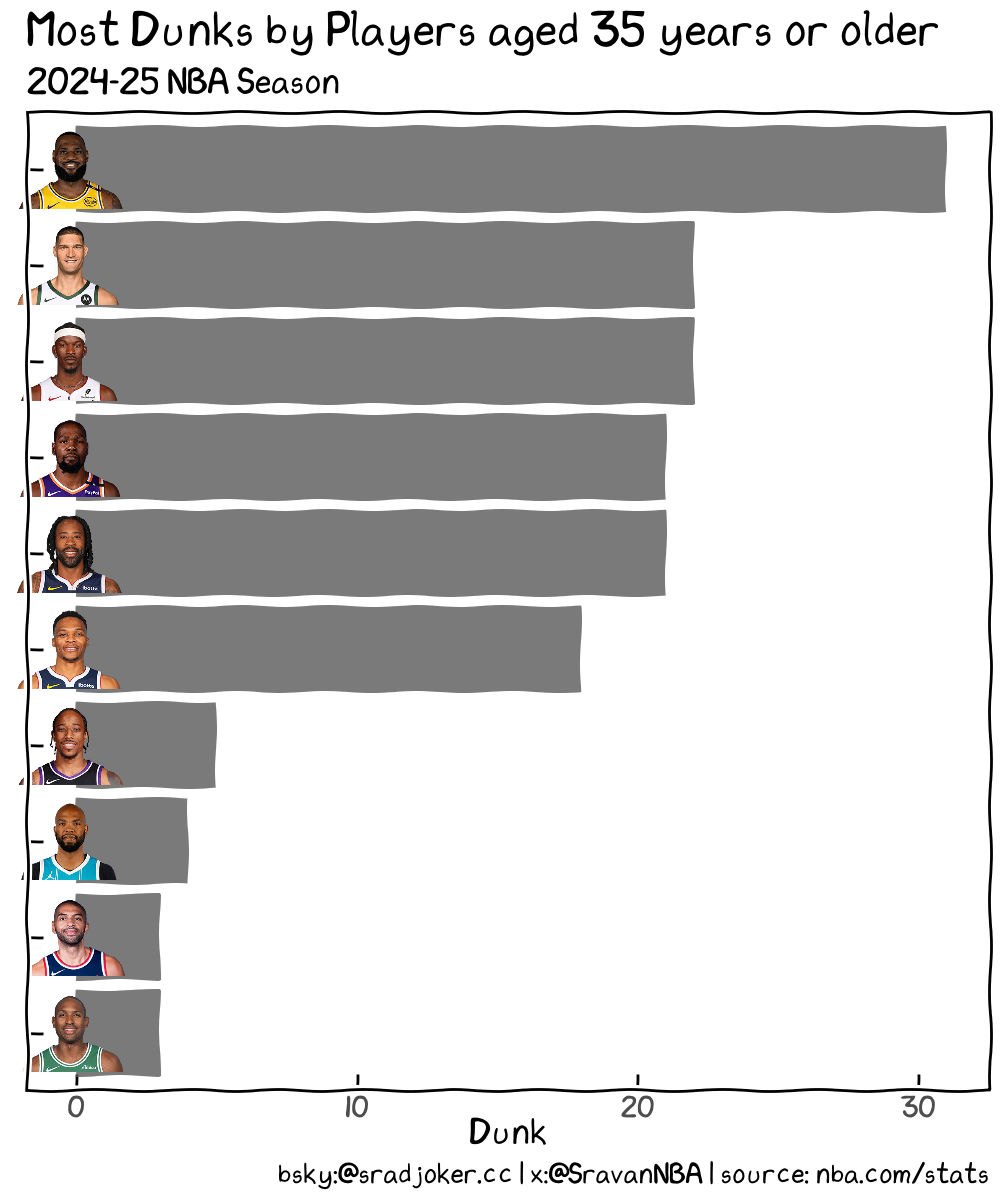

In [8]:
data = df4.head(10)
players = data["player_name"].to_list()
players.reverse()
data["player_name"] = pd.Categorical(data["player_name"],categories=players,ordered=True)
p= (
    ggplot(data)
    + aes(x="player_name",y="Dunk",image="P")
    + geom_col(alpha=0.8)
    + geom_image(aes(y=-0.2),size=0.15)
    + coord_flip()
    + theme_idv
    + theme(
        axis_text_y=element_blank(),
        axis_title_y=element_blank(),
        figure_size=(5,6)
    )
    + labs(
        title="Most Dunks by Players aged 35 years or older",
        subtitle=f"{get_ss(season)} NBA Season",
        caption="bsky:@sradjoker.cc | x:@SravanNBA | source: nba.com/stats",
    )
)
p

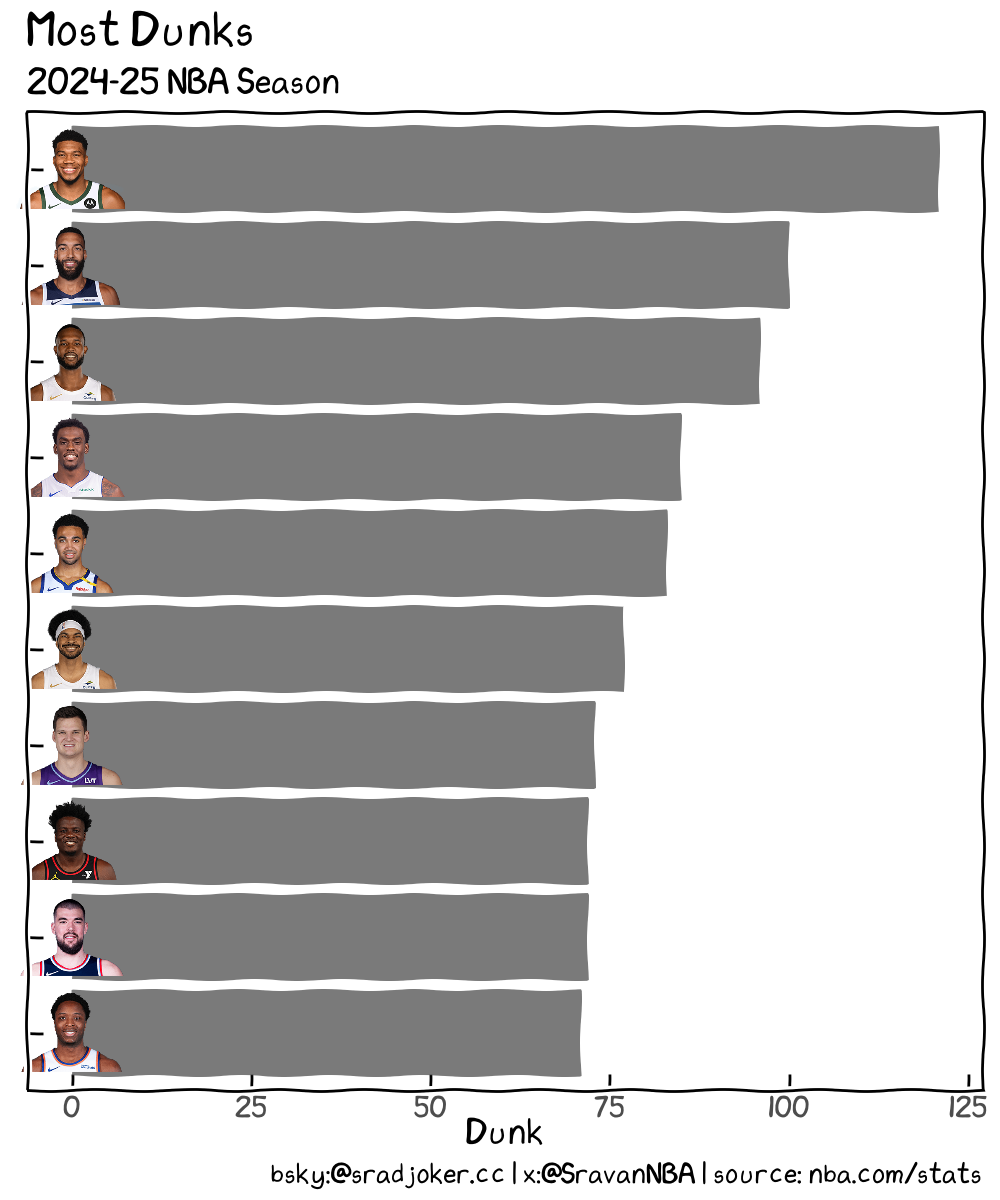

In [9]:
df4 = df3.sort_values("Dunk",ascending=False).reset_index(drop=True)
data = df4.head(10)
players = data["player_name"].to_list()
players.reverse()
data["player_name"] = pd.Categorical(data["player_name"],categories=players,ordered=True)
p= (
    ggplot(data)
    + aes(x="player_name",y="Dunk",image="P")
    + geom_col(alpha=0.8)
    + geom_image(aes(y=-0.2),size=0.15)
    + coord_flip()
    + theme_idv
    + theme(
        axis_text_y=element_blank(),
        axis_title_y=element_blank(),
        figure_size=(5,6)
    )
    + labs(
        title="Most Dunks",
        subtitle=f"{get_ss(season)} NBA Season",
        caption="bsky:@sradjoker.cc | x:@SravanNBA | source: nba.com/stats",
    )
)
p